In [22]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from sklearn.model_selection import train_test_split

In [23]:
np.random.seed(729)
num_observations = 500
lr1 = 1e-5
MAX_STEP = 100

In [24]:
class perception():
    def __init__(self, lr, dataset):
        self.lr = lr

        # 分割数据集
        x, y = dataset
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(
            x, y, test_size=0.1, shuffle=True)
        self.y_train = self.y_train.reshape(1, -1)
        self.y_test = self.y_test.reshape(1, -1)

        # 第一列插入 1
        self.X_train = np.hstack(
            (np.ones((self.x_train.shape[0], 1)), self.x_train))
        self.X_test = np.hstack(
            (np.ones((self.x_test.shape[0], 1)), self.x_test))

        # 权重系数
        self.w = np.random.rand(self.X_train.shape[1]).reshape(
            (1, self.X_train.shape[1]))

        # 记录 loss
        self.loss_history = []

    def fit(self):
        count = 0
        w_0 = self.w
        while count < MAX_STEP:
            for i in range(self.X_train.shape[0]):
                pred = self.w.dot(self.X_train[i].T)
                self.w = self.w+self.lr * \
                    (self.y_train[0][i]-pred)*self.X_train[i]
            count = count + 1
            self.loss_history.append(
                self.loss(self.w.dot(self.X_train[i].T)))

            if count % 10 == 1:
                P, R, acc = self.mertix(self.X_train, self.y_train)
                print("Precise: %.2f%%, Recall: %.2f%%, acc: %.2f%%" %
                      (100*P, 100*R, 100*acc))

                show_clf(self.X_train, self.y_train, self.w, w_0)
                w_0 = self.w

        P, R, acc = self.mertix(self.X_test, self.y_test)
        print("TEST:\nPrecise: %.2f%%, Recall: %.2f%%, acc: %.2f%%" %
              (100*P, 100*R, 100*acc))
        show_loss(self.loss_history)

    def mertix(self, X, Y):
        """P、R、acc
        Args:
            pred: output label of model
        """
        pred = self.w.dot(X.T) > 0.5

        # P = TP / (TP + FP)
        index_ = pred == 1
        TP = (Y[index_] == 1).sum()
        P = TP / index_.sum()

        # R = TP / (TP + FN)
        R = TP / Y.sum()

        # acc = (TP + TN) / (TP + FP + TN + FN)
        acc = ((pred == Y).sum())/pred.shape[1]

        return P, R, acc

    def loss(self, pred):
        return 0.5*np.average(pow(pred-self.y_train, 2))


In [25]:
def dataset():
    # 生成两个二元正态分布矩阵作为两类样本，各500个
    x1 = np.random.multivariate_normal(
        [0, 0], [[1, .75], [.75, 1]], num_observations)
    x2 = np.random.multivariate_normal(
        [1, 4], [[1, .75], [.75, 1]], num_observations)

    X = np.vstack((x1, x2)).astype(np.float32)
    Y = np.hstack((np.zeros(num_observations), np.ones(num_observations)))
    return X, Y

In [26]:
def show_clf(x, y, w, w_0):
    fig, ax = plt.subplots()
    ax.scatter(x[:, 1], x[:, 2], c=y, alpha=0.9, edgecolors='black')

    xmin, xmax = x[:, 1].min()-1, x[:, 1].max()+1
    xx = np.linspace(xmin, xmax, num_observations)
    y1 = (0.5 - w[:, 0]-xx*w[:, 1]) / w[:, 2]
    y2 = (0.5 - w_0[:, 0]-xx*w_0[:, 1]) / w_0[:, 2]
    plt.plot(xx, y1, label='w')
    plt.plot(xx, y2, label="w_0")
    display.clear_output(wait=True)
    plt.show()

In [27]:
def show_loss(loss):
    xx = range(MAX_STEP)
    yy = loss
    plt.plot(xx, yy)
    plt.show()

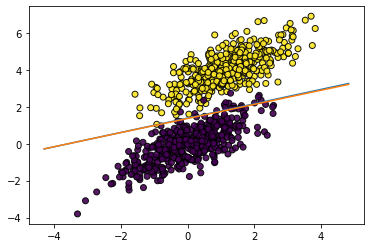

TEST:
Precise: 98.21%, Recall: 100.00%, acc: 99.00%


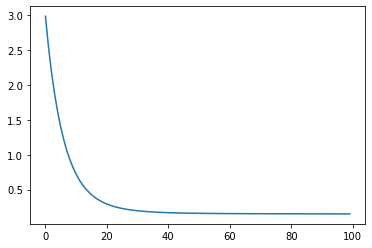

In [28]:
if __name__ == "__main__":
    clf = perception(lr1, dataset())
    clf.fit()